## Set the LLM

In [1]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o", temperature=0
)  # doesn't work with gpt-3.5-turbo. image_url is not supported. Other models are gpt-4o-mini, gpt-4, gpt-4-turbo, gpt-4o

In [15]:
# # OR local llm but this does not work with agents and tools
# from langchain_ollama import ChatOllama

# llm = ChatOllama(
#     # model="llama3-groq-tool-use",
#     # model="tinyllama", # Does not support tools
#     # model="llava-phi3",
#     # model="llava",  # Does not support tools
#     model="llama3.1", # Does not work, calls describe_image tool that is not existent
#     temperature=0,
# )

## Create the prompt

In [2]:
from langchain_core.prompts import ChatPromptTemplate
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant"),
        ("placeholder", "{chat_history}"),
        (
            "human",
            [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "{image_data}"
                    },
                },  # TODO couldn't find a way to make this optional, even putting it in placeholder
                {
                    "type": "text",
                    "text": "{text_data}",
                },
            ],
        ),
        ("placeholder", "{agent_scratchpad}"),
    ]
)

## Create a tool

In [3]:
from langchain.tools import tool

# create_tool_calling_agent is not happy if tools is an empty list, so just add a dummy tool
@tool
def useless_tool():
    """This is a useless tool"""
    return "This is a useless tool"

## Create the agent

In [4]:
from langchain.agents import create_tool_calling_agent
from langchain.agents import AgentExecutor

tools = [useless_tool]
agent = create_tool_calling_agent(llm, tools, prompt)  # the brains

# Define the agent executor

agent_executor = AgentExecutor(
    agent=agent, tools=tools, verbose=True
)  # this repeatedly calls the agent and executes the tools

## Load thes spam image

*********Example binary_fc:
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x02\x00\x00\x02\xee\x08\x06\x00\x00\x004v\xb4v\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x12t\x00\x00\x12t\x01\xdef\x1fx\x00\x00\xf6\xdeIDATx^\xec\xfd\xffw\x14\xe7\x9d\xe7\x7f\xab\xc5\xfe\x11%\xfc\x93l2\x9f%\xe3\xecm\x9c9\'\x08\xef\xf9\x9c p\x12\x84\xb3\xf7" \x19\xc0\xce\xc4\x88\xe4\xb6\x01\xcf$|Ib\x84\xb31\x12\xc9\x18I\xf6gl\xc8\xd9\x01\xc9\xde\x19$y&Fdb\x10\xd91\xb4|O\x0c-g\x0c\xad\xcc8\x16\xb3\xc143&\xd0wB\xac\xde\x8c\x02u6\x18\xde\xf7uU]\xdd]\xddj\tU\xabPW\xab\x9e\x8fs\xea\x1c\xab\xba\xba\xba\xea\xdd%\xac\xf7\xab\xaa\xae\xaa\x11\x00\x00\x00\x00\x00\x10\x19\x04\x01\x00\x00\x00\x00\x00D\x08A\x00\x00\x00\x00\x00\x00\x11B\x10\x00\x00\x00\x00\x00@\x84\x10\x04\x00\x00\x00\x00\x00\x10!\x04\x01\x00\x00\x00\x00\x00D\x08A\x00\x00\x00\x00\x00\x00\x11B\x10\x00\x00\x00\x00\x00@\x84\x10\x04\x00\x00\x00\x00\x00\x10!\x04\x01\x00\x00\x00\x00\x00D\x0
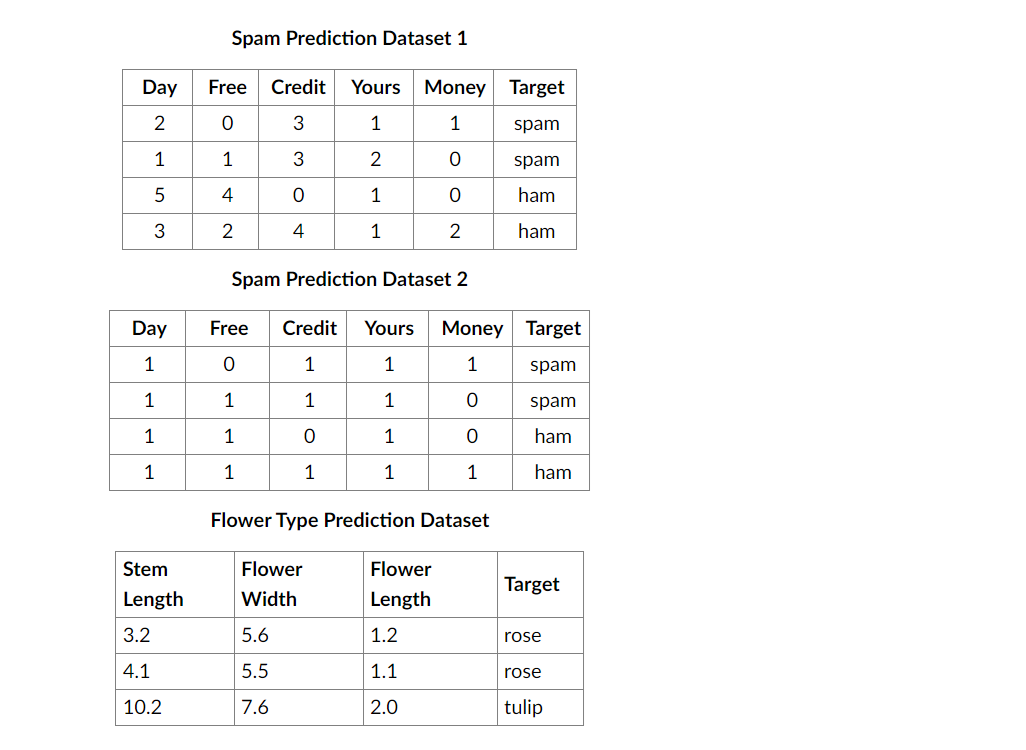

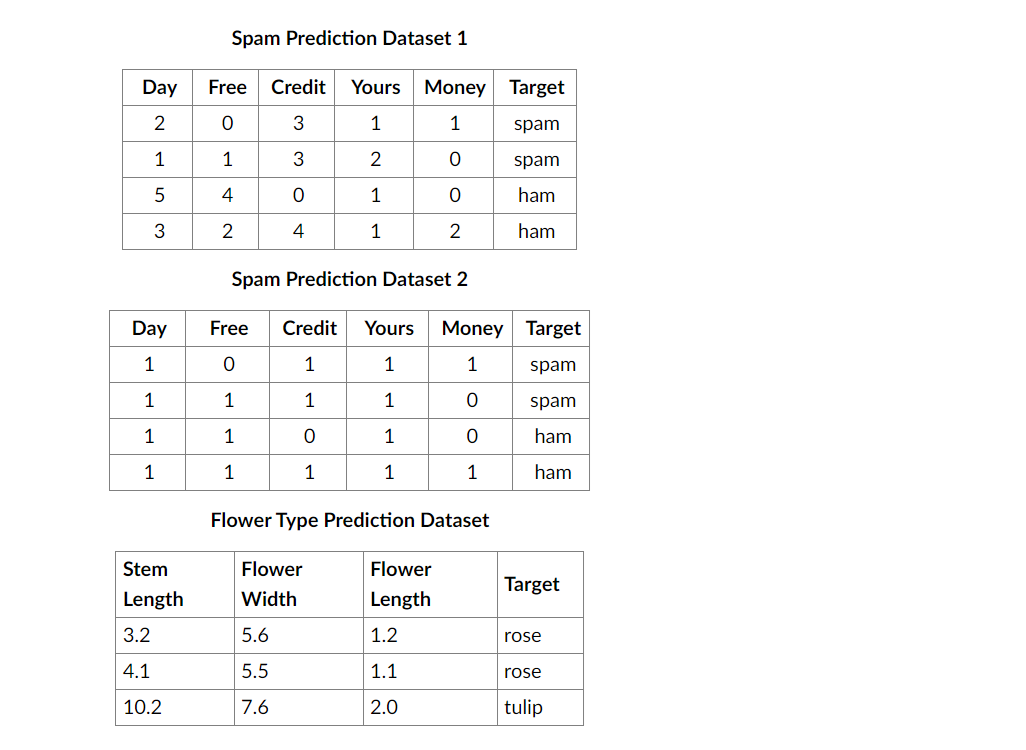

In [48]:
import base64
# if image is from the internet, you can use import httpx, then httpx.get(image_url).content

# To display image in notebook
from IPython.display import Image

filepath = 'image.png'
binary_fc = open(filepath, "rb").read()  # fc aka file_content
print('''*********Example binary_fc:\n''', binary_fc)
base64_utf8_str = base64.b64encode(binary_fc).decode("utf-8")

ext = filepath.split(".")[-1]
dataurl = f"data:image/{ext};base64,{base64_utf8_str}"
print('''*********Example dataurl:\n''', dataurl)

Image(filepath)

## GPT 3.5 doesn't work

In [58]:
# # Try GPT-3.5-turbo. This doesn't work
# llm = ChatOpenAI(model="gpt-4-turbo", temperature=0)
# agent = create_tool_calling_agent(llm, tools, prompt)  # the brains
# agent_executor = AgentExecutor(
#     agent=agent, tools=tools, verbose=True
# )  # this repeatedly calls the agent and executes the tools

## GPT-4-turbo too expensive



> Entering new AgentExecutor chain...
In the third dataset, "Flower Type Prediction Dataset," the different target types are "rose" and "tulip."

> Finished chain.


{'image_data': '',
 'text_data': 'What are the different target types in the third dataset?',
 'output': 'In the third dataset, "Flower Type Prediction Dataset," the different target types are "rose" and "tulip."'}
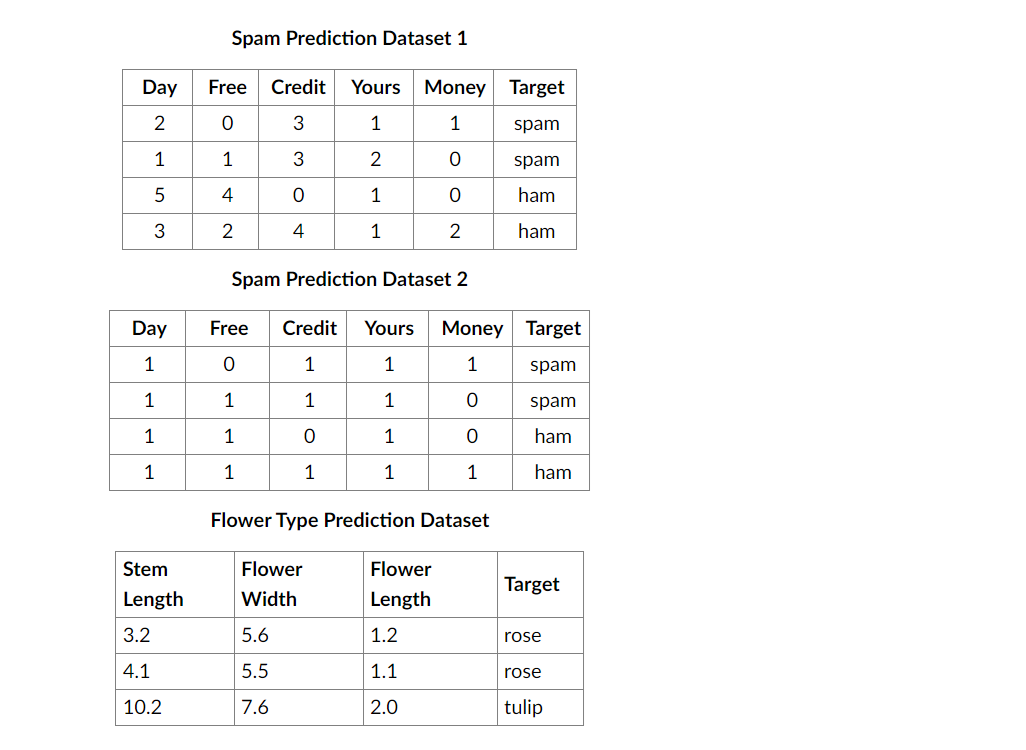

In [59]:
# # WARNING! Each invocation costs around $0.60 as of August 30, 2024 using GPT-4-turbo, which is even more expensive than GPT-4o
# agent_executor.invoke(
#     {
#         "image_data": dataurl,
#         "text_data": "What are the different target types in the third dataset?",
#     }
# )  # this will call the agent and execute the tools



> Entering new AgentExecutor chain...
To determine the best version of Naïve Bayes for each dataset, we need to consider the nature of the features:

1. **Spam Prediction Dataset 1**:
   - **Best Version**: Multinomial Naïve Bayes
   - **Reasoning**: This dataset contains integer counts of words (e.g., "Free", "Credit", "Yours", "Money") in emails. Multinomial Naïve Bayes is well-suited for text classification problems where features represent the frequency of words or terms.

2. **Spam Prediction Dataset 2**:
   - **Best Version**: Binomial Naïve Bayes
   - **Reasoning**: This dataset contains binary features (0 or 1) indicating the presence or absence of specific words in emails. Binomial Naïve Bayes is appropriate for binary/boolean features, making it the best choice for this dataset.

3. **Flower Type Prediction Dataset**:
   - **Best Version**: Gaussian Naïve Bayes
   - **Reasoning**: This dataset contains continuous numerical features (e.g., "Stem Length", "Flower Width", "Flo

{'image_data': '',
 'text_data': 'The three versions of Naïve Bayes are binomial, multinomial, and Gaussian. Identify the best version of Naïve Bayes theorem to use to predict the target variable for each of the three datasets listed below. Justify your reasoning for choosing the version of the Naïve Bayes theorem that you selected for each of the three datasets. Answer in around 150 words.',
 'output': 'To determine the best version of Naïve Bayes for each dataset, we need to consider the nature of the features:\n\n1. **Spam Prediction Dataset 1**:\n   - **Best Version**: Multinomial Naïve Bayes\n   - **Reasoning**: This dataset contains integer counts of words (e.g., "Free", "Credit", "Yours", "Money") in emails. Multinomial Naïve Bayes is well-suited for text classification problems where features represent the frequency of words or terms.\n\n2. **Spam Prediction Dataset 2**:\n   - **Best Version**: Binomial Naïve Bayes\n   - **Reasoning**: This dataset contains binary features (0 o
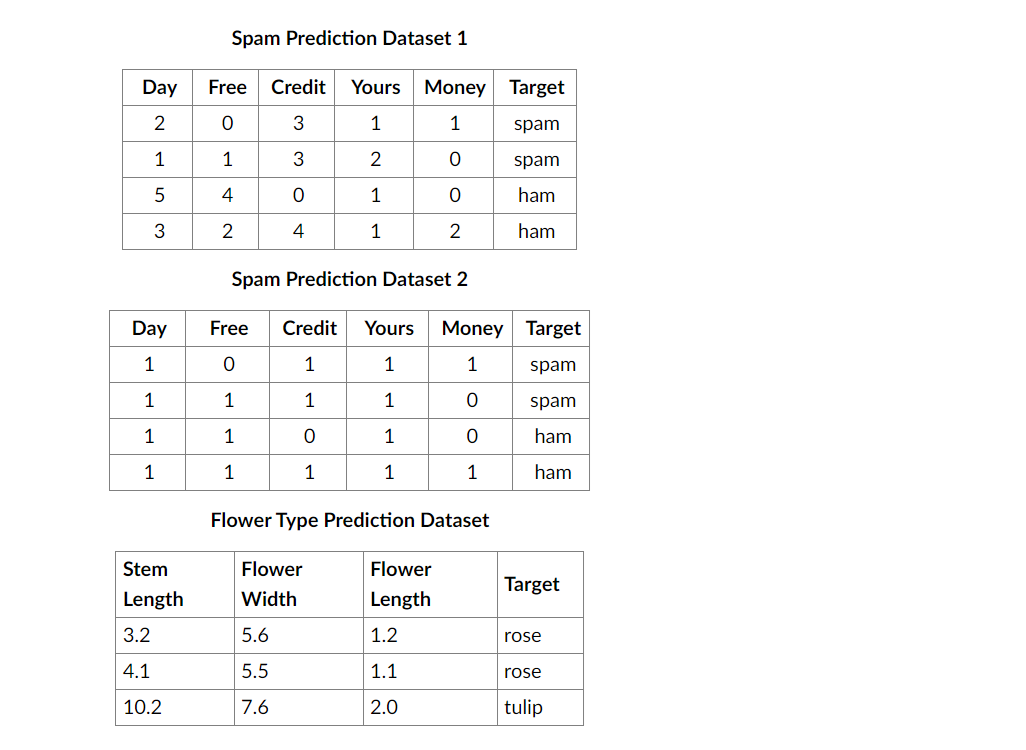

In [64]:
# WARNING! Each invocation costs around $0.25 as of August 30, 2024 using GPT-4o
agent_executor.invoke(
    {
        "image_data": dataurl,
        "text_data": "The three versions of Naïve Bayes are binomial, multinomial, and Gaussian. Identify the best version of Naïve Bayes theorem to use to predict the target variable for each of the three datasets listed below. Justify your reasoning for choosing the version of the Naïve Bayes theorem that you selected for each of the three datasets. Answer in around 150 words.",
    }
)  

## Load car prices image

*********Example binary_fc:
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x07I\x00\x00\x02p\x08\x06\x00\x00\x00\xec\xa2Y\x13\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\tpHYs\x00\x00\x12t\x00\x00\x12t\x01\xdef\x1fx\x00\x00\xff\xa5IDATx^\xec\xdd\x07\\U\xe5\x1b\x07\xf0\x9f\x03QT\xcc\x12s\x91)\xe0\x00\x17\xe0\x02se\x8eJ\xc5r\xf5wU*\x96\xa3r\xa4\xa2\xb9\x07n\xd1\xdc\xe0(\x1c9S\xd4\x14\'\xb8\xc0\x94\xe1\x00\\\xe0\x02G\x82\x83\xab\x02W\xc6\xf9\xbf\xe7\xde\x03\\\xe0\x82\xa08\x90\xdf\xf7\xd3\xc9{\xf6{\xcey\xce\xb9\x97\xfb\xdc\xf7}\x0bH\x02\x88\x88\x88\x88\x88\x88\x88\x88\x88\x88\x88\x88\x88\x88\xf2\x89\x82\xca\xbfDDDDDDDDDDDDDD\xf9\x02\x93\xa4DDDDDDDDDDDDD\x94\xaf\xbcps\xbb\xaa\xc7O\xf0\xe4i,\xd4\xeagHHHP\xa6\x12\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\x11\xbd\xddr\x9c$\x95\x93\xa3\xf7\x1fD\xc3\xb0\x88\x01J\x94(\x0e\xa3b\x86(T\xa8\x10\n\x14(\xa0,ADDDDDDDDDDDDD\xf4\xf6\xcaQ\x92\xf4^\xd4\x03\xa8\xe3\xd4(\xf3Ai\x14+VT\x99JDDDDDDDDD
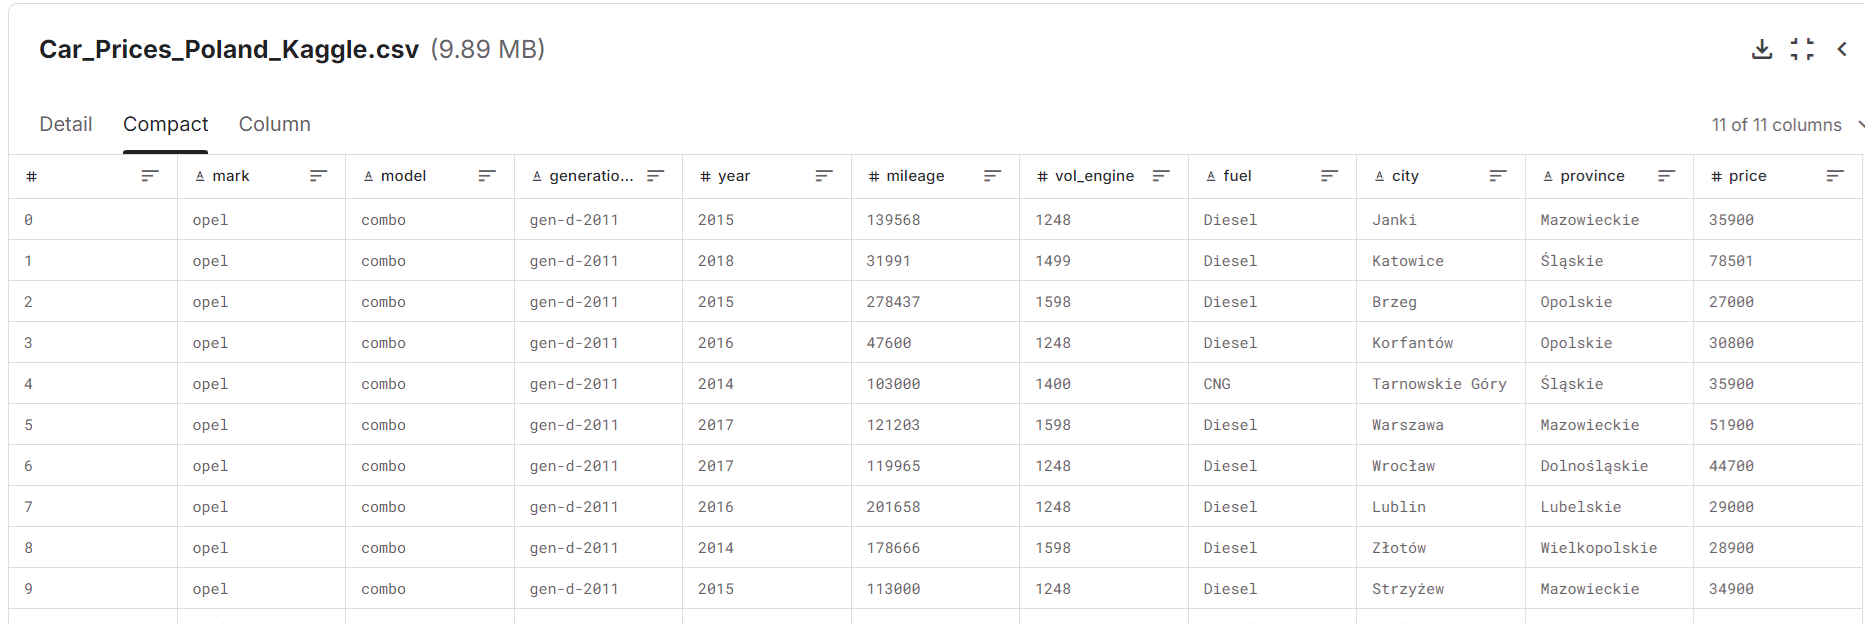

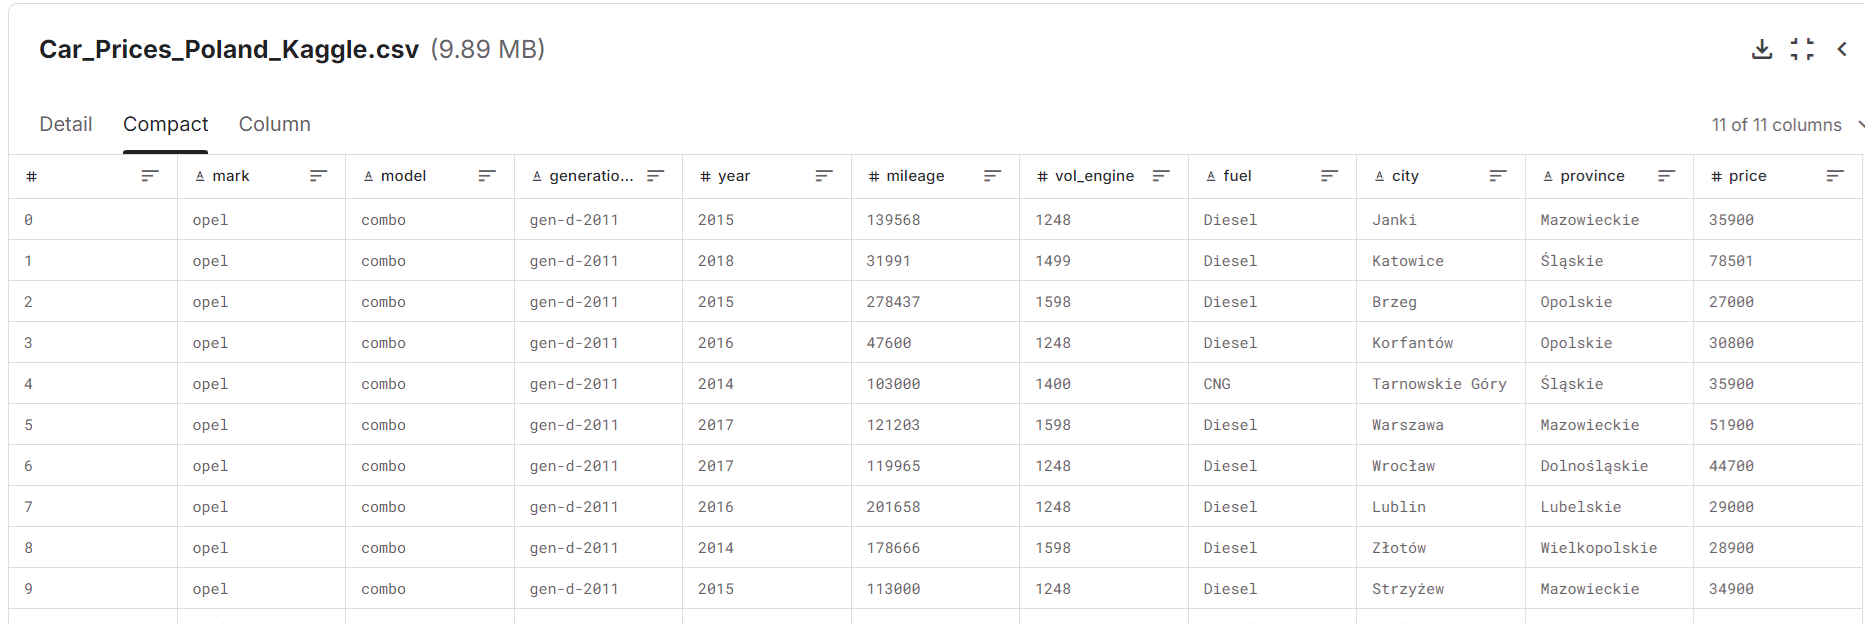

In [70]:
filepath = "car_prices_poland.png"
binary_fc = open(filepath, "rb").read()  # fc aka file_content
print("""*********Example binary_fc:\n""", binary_fc)
base64_utf8_str = base64.b64encode(binary_fc).decode("utf-8")

ext = filepath.split(".")[-1]
dataurl = f"data:image/{ext};base64,{base64_utf8_str}"
print("""*********Example dataurl:\n""", dataurl)

Image(filepath)

## Load smiley so tokens not so big

*********Example binary_fc:
 b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x04\x03\x00\x00\x00\x88\xcb|\xe6\x00\x00\x00\x18PLTE\xff\xd9\x00\xef\xef\xef\x01\x01\x00\xff\xff\xff\xff\xe8\x0f\xfb\xea\x86cT\x00\xb5\x9a\x00\x96c\x9a\xe4\x00\x00\x0e+IDATx\xda\xec\x9d\xcdo\xa3:\x10\xc0\x9d\xae\xfdz\r"\xb9Wh\x95^7\xa2\xb9;/ds\x05\xd1\xdcWQ\xb5\xbdVU\xd5\xfc\xfb/@\xd2\xf0e\x98\x19\x7f@\x9f2\x97\x15\xbbK\xfcc<3\xf6\x18\xe3aa!K\xaf\x10\xed\xcb\xe5|\xbf\x8f"V\x08\x8f\xb6\xfb}b\xe8\x97\xaf\x97\xcc$\xf4\t8\x92\xac)\xd1~?V\xe8\xfd3\xeb\x90\xed\xde\x1f\x1d\xf4\xbc\x93\xb8\xb0\x95m2*\xe8}\xc4@\x12%\xa3\x81\x9eK\x06\x16\xbe\x1f\x05\xf4<b(\xe1\xc9\xe0\xd0\xabg\x86\x16\x91\x0c\x0b\xbdg$\xd9\x0f\x08MQ\xf3E\xd9CA\xef\x99\x86\xec\x87\x81~fZ\xb2\xf5\xddCc\xe2\x9c"\x8c\xa4\xae\xa1\xe7\xcc\x80$n\xa1\x9f\x99\x11\xd9\x12\xa1\xcf\x7f\xfa\xe7\xbf\x87]\x1ab\xbe\x186\xb8\xdd\xf3%\t\xda\x18\xf3)\xf6\xf9\x8e\xa0c\xc6\x8cS\xdb\x866\xca|\xa1\xb6\x0cm\x98\xf9Lm\x17\xda8sAm\x15\xda\x02\xf3\x89\xda.\xf43\xb
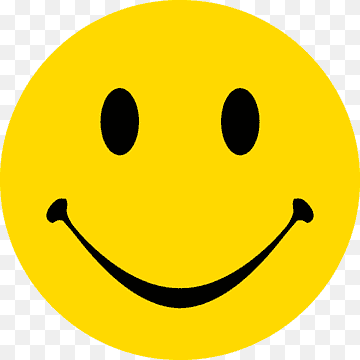

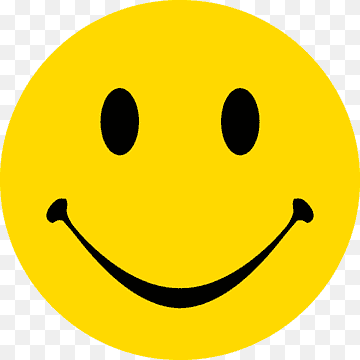

In [5]:
import base64
# To display image in notebook
from IPython.display import Image
filepath = "image2.png"
binary_fc = open(filepath, "rb").read()  # fc aka file_content
print("""*********Example binary_fc:\n""", binary_fc)
base64_utf8_str = base64.b64encode(binary_fc).decode("utf-8")

ext = filepath.split(".")[-1]
dataurl = f"data:image/{ext};base64,{base64_utf8_str}"
print("""*********Example dataurl:\n""", dataurl)

Image(filepath)



> Entering new AgentExecutor chain...
Yellow smiley face with black eyes and mouth.

> Finished chain.


{'image_data': '',
 'text_data': 'Describe the image_data in less than 10 words',
 'output': 'Yellow smiley face with black eyes and mouth.'}
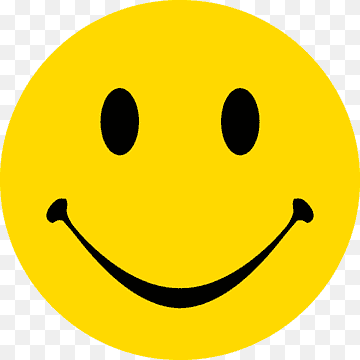

: 

In [6]:
# WARNING! Each invocation costs around $0.25 as of August 30, 2024 using GPT-4o. 1.4seconds
agent_executor.invoke(
    {
        "image_data": dataurl,
        "text_data": "Describe the image_data in less than 10 words",
    }
)